# Getting the Data

In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/shivanichauhan/Desktop/Projects/Flipkart Reviews.csv')
df.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


# Cleaning the data

In [3]:
cleaned_df = df.dropna()

cleaned_df.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [4]:
print(df.shape)
print(cleaned_df.shape)

(2304, 4)
(2304, 4)


In [5]:
d1 = df.isnull().sum()
d1

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64

# Transforming Flipkart Reviews into Pie

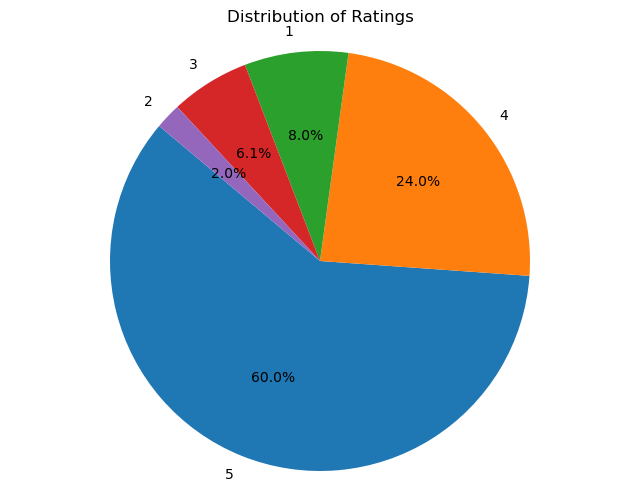

In [6]:
ratings = cleaned_df['Rating'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(ratings, labels=ratings.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()

# Using NLTK to Unmask Customer Emotions

In [7]:
!pip install nltk

In [8]:
#importing nltk
import nltk

#using VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shivanichauhan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:

#--- Import SentimentIntensityAnalyzer from nltk.sentiment.vader ---
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# Create a DataFrame 'data' from the 'Review' column of 'cleaned_df'
data = pd.DataFrame(cleaned_df['Review'])

# Calculate sentiment polarity scores for each review
data['Sentiment'] = data['Review'].apply(lambda x: sid.polarity_scores(x))

# Extract sentiment scores into separate columns
data['Positive'] = data['Sentiment'].apply(lambda x: x['pos'])
data['Negative'] = data['Sentiment'].apply(lambda x: x['neg'])
data['Neutral'] = data['Sentiment'].apply(lambda x: x['neu'])

# Drop the 'Sentiment' column if no longer needed
data.drop(columns=['Sentiment'], inplace=True)

# Display the updated DataFrame to verify
data.head()

,Review,Positive,Negative,Neutral
0,Best under 60k Great performanceI got it for a...,0.314,0.073,0.613
1,Good perfomence...,0.744,0.000,0.256
2,Great performance but usually it has also that...,0.119,0.000,0.881
3,My wife is so happy and best product 👌🏻😘,0.568,0.000,0.432
4,"Light weight laptop with new amazing features,...",0.467,0.000,0.533


# Turning Customer Emotions into Numbers

In [10]:
x = round(data['Positive'].sum(), 2)
y = round(data['Negative'].sum(), 2)
z = round(data['Neutral'].sum(), 2)

print('Total Positive score:', x)
print('Total Negative Score:', y)
print('Total Neutral Score:', z)

Total Positive score: 835.67
Total Negative Score: 104.92
Total Neutral Score: 1363.41
